<h1> United Kingdom Road Accident Data Analysis </h1>

<h4> Inclusive Year: 2019 - 2022</h4>

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import calendar
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h3> Changing Dtypes </h3>

In [7]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [8]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [9]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions             object
District Area                object
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions      object
Road_Type                    object
Urban_or_Rural_Area          object
Weather_Conditions           object
Vehicle_Type                 object
dtype: object

<h1> Converting Object To Datetime Data Type </h1>

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [11]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [12]:
accident['Accident Date']

0        2019-06-05
1        2019-07-02
2        2019-08-26
3        2019-08-16
4        2019-09-03
            ...    
660674   2022-02-18
660675   2022-02-21
660676   2022-02-23
660677   2022-02-23
660678   2022-02-28
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

<h1> Filling Up Null Values </h1>

In [13]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [14]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted weather condition')

In [15]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1> Changing Data Types </h1>

In [16]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [17]:
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Latitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [18]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1> Extracting Date Information </h1>

In [19]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['Day Of Week'] = accident['Accident Date'].dt.dayofweek # Monday = 0, Sunday = 6

In [20]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
Day Of Week                0
dtype: int64

<h1>  Creating A New Dataframe For Each Year </h1>

In [21]:
accident_2019 = accident[accident['Year'] == 2019]
accident_2020 = accident[accident['Year'] == 2020]
accident_2021 = accident[accident['Year'] == 2021]
accident_2022 = accident[accident['Year'] == 2022]

<h1> Univariate </h1>

<h2> Analysis From 2019 </h2>

<h1> 1. In the Year 2019 how many accidents happened in a Dual Carriageway? </h1>

In [22]:
accident_dual = accident_2019[accident_2019['Road_Type'] == 'Dual carriageway']
accident_dual.value_counts().sum()

np.int64(28162)

In [23]:
accident_2019['Road_Type'].value_counts().sum()

np.int64(182115)

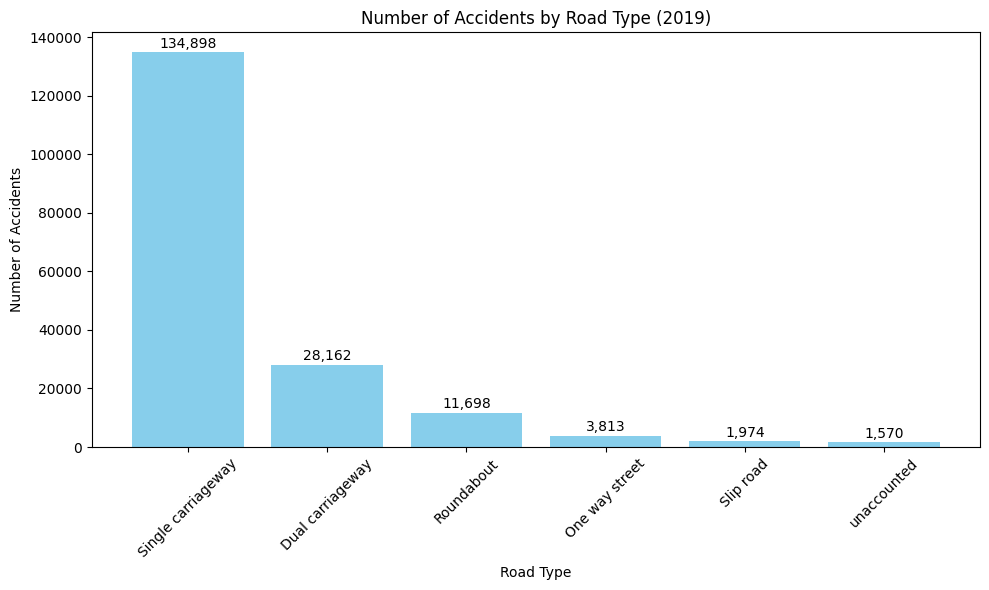

In [24]:
road_type_counts = accident_2019['Road_Type'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(road_type_counts.index, road_type_counts.values, color='skyblue')
plt.title('Number of Accidents by Road Type (2019)')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height):,}', ha='center', va='bottom')

plt.show()

<h2> Insight 1 </h2>

<h4> There are 28162 accidents that happened in a dual carriageway road type, that constitute to 15.46% of the total accidents in 2019</h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 2. In the Year 2019 how many accidents happened under weather conditions? </h1>

In [25]:
accident_2019['Weather_Conditions'].value_counts().sum()

np.int64(182115)

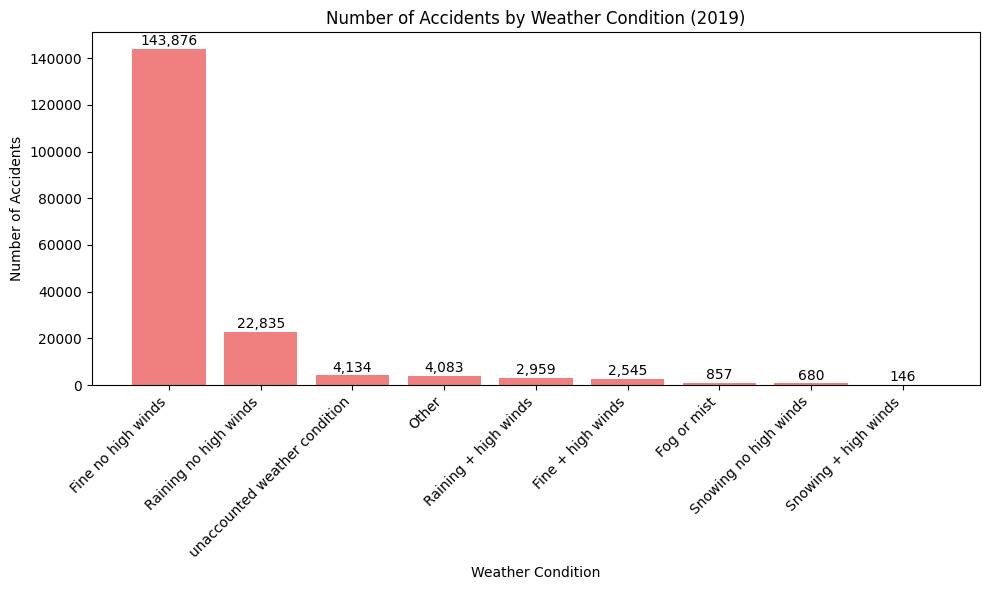

In [26]:
weather_counts = accident_2019['Weather_Conditions'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(weather_counts.index, weather_counts.values, color='lightcoral')
plt.title('Number of Accidents by Weather Condition (2019)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate bars with counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{int(height):,}', ha='center', va='bottom')

plt.show()

<h2> Insight 2 </h2>

<h4> There are 182115 accidents that happened under weather conditions </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 3. In the Year 2019 what is the weather conditions that has more accidents? </h1>

In [27]:
accident_2019['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds               143876
Raining no high winds             22835
unaccounted weather condition      4134
Other                              4083
Raining + high winds               2959
Fine + high winds                  2545
Fog or mist                         857
Snowing no high winds               680
Snowing + high winds                146
Name: count, dtype: int64

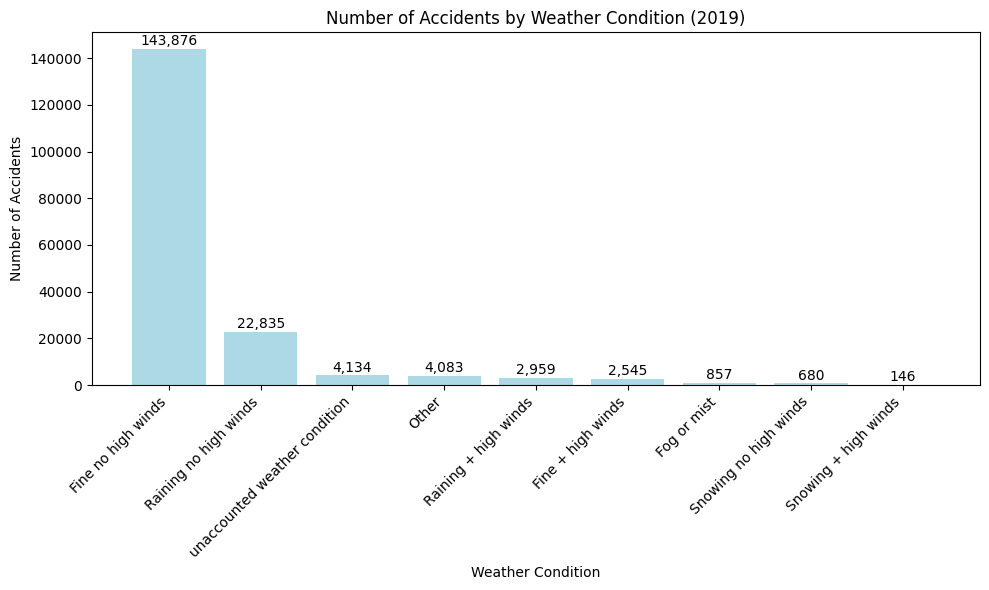

In [28]:
# Get accident counts by weather condition
weather_counts = accident_2019['Weather_Conditions'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(weather_counts.index, weather_counts.values, color='lightblue')
plt.title('Number of Accidents by Weather Condition (2019)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{int(height):,}', ha='center', va='bottom')

plt.show()

<h2> Insight 3</h2>

<h4> The weather conditions that has more accidents is "Fine no High Winds" with 79% of the total accidents of all weather conditions </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h2> Analysis From 2020 </h2>

<h1> 4. In the Year 2020 what is the total of accidents? </h1>

In [29]:
accident_2020.value_counts().sum()

np.int64(170591)

<h2> Insight 4</h2>

<h4> There are 170591 accidents that happened in the year 2020 </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 5. In the Year 2020 what road surface conditions is has the most accidents? </h1>

In [30]:
accident_2020['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                          113506
Wet or damp                   52076
Frost or ice                   3870
Snow                            598
Flood over 3cm. deep            331
unknown surface condition       210
Name: count, dtype: int64

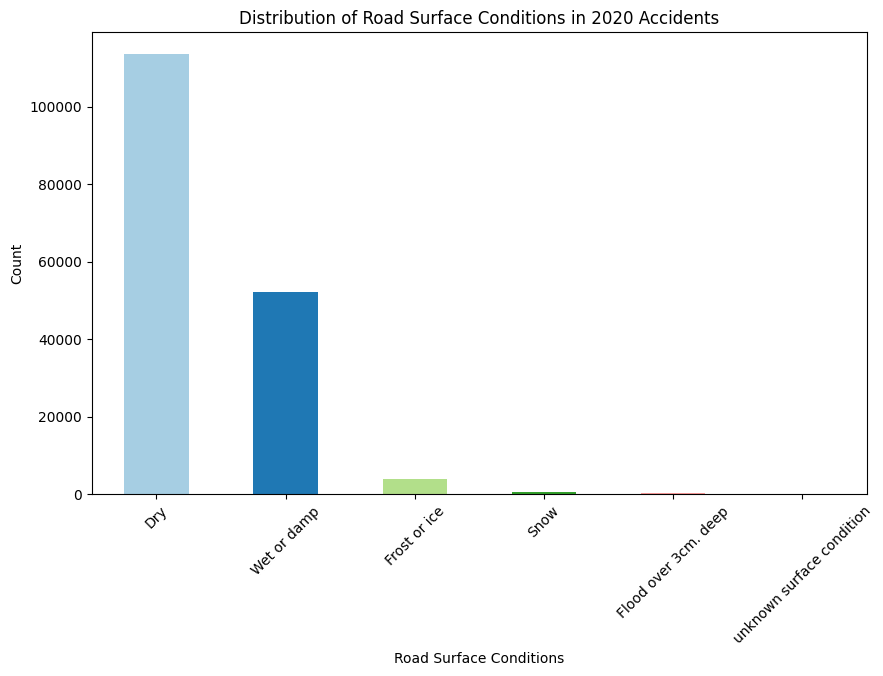

In [31]:
road_surface_counts = accident_2020['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
road_surface_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Distribution of Road Surface Conditions in 2020 Accidents')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<h2> Insight 5</h2>

<h4> The road surface condition that has the most accidents is "Dry" with a 113506 total of accidents, making up 66.53% of the total accidents in 2020 </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h2> Analysis From 2021 </h2>

<h1> 6. In 2021 what area is has more accident Urban or Rural area?</h1>

In [32]:
accident_2021['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          104538
Rural           59016
Unallocated         0
Name: count, dtype: int64

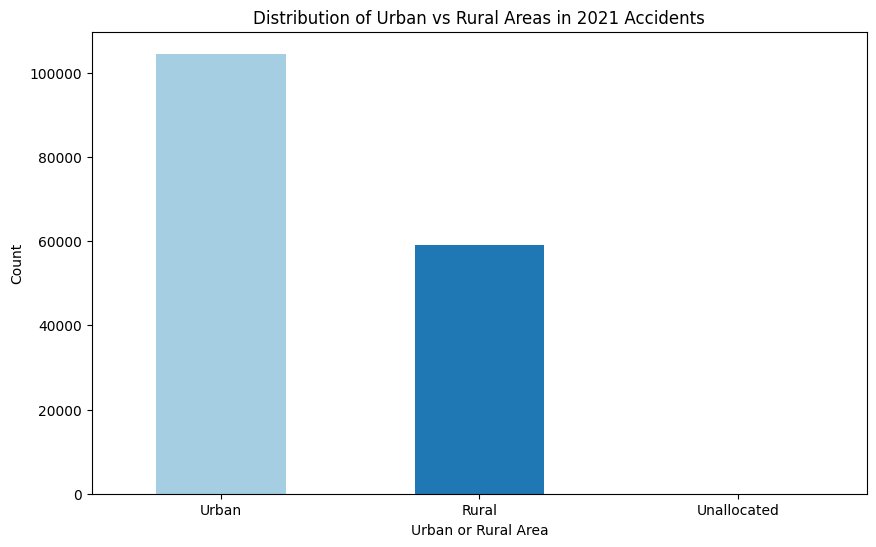

In [33]:
urban_rural_counts = accident_2021['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(10, 6))
urban_rural_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Distribution of Urban vs Rural Areas in 2021 Accidents')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


<h2> Insight 6</h2>

<h4> The area that has more accidents is the Urban area with a 104538 accidents making up 63.91% of the total accidents in 2021 </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 7. How many accidents happened in 2021, and what is the most common light conditions to have an accidents?</h1>

In [34]:
accident_2021.value_counts().sum()

np.int64(163554)

In [35]:
accident_2021['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       119518
Darkness - lights lit           32549
Darkness - no lighting           9226
Darkness - lighting unknown      1607
Darkness - lights unlit           654
Name: count, dtype: int64

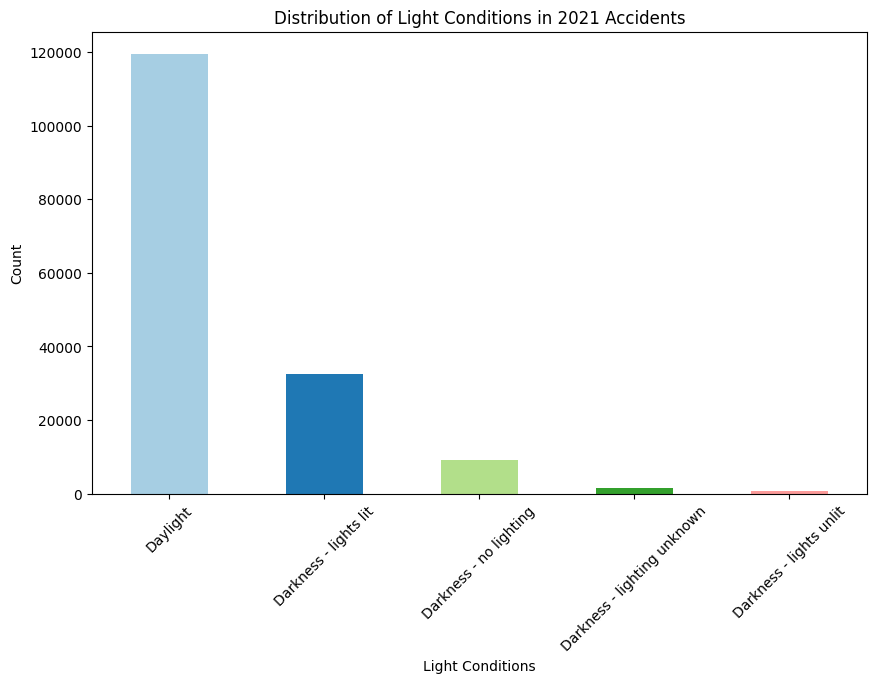

In [36]:
light_conditions_counts = accident_2021['Light_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
light_conditions_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Distribution of Light Conditions in 2021 Accidents')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<h2> Insight 7</h2>

<h4> There are a total of 163554 accidents that happened in the year 2021, and the light condition to has more accidents is "Daylight" making up 73.07% of the total accidents. </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h2> Analysis From 2022 </h2>

<h1> 8. What is the most common Accident Severity?</h1>

In [37]:
accident_2022['Accident_Severity'].value_counts()

Accident_Severity
Slight     124093
Serious     18777
Fatal        1549
Name: count, dtype: int64

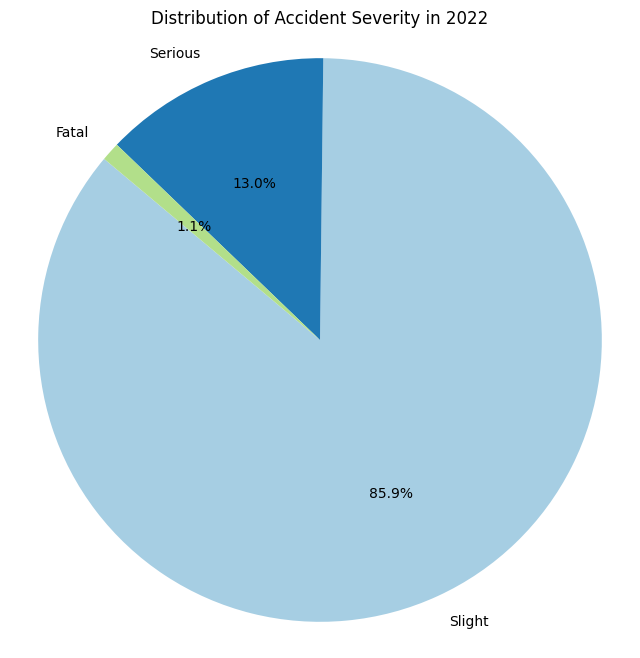

In [38]:
severity_counts = accident_2022['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Accident Severity in 2022')
plt.axis('equal')
plt.show()


<h2> Insight 8</h2>

<h4> The most common accident severity is "Slight" with a total of 124093, making up the 85.92% of the total accidents in 2022 </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 9. What is the top 3 District Area That Has The Most Accidents </h1>

In [39]:
accident_2022['District Area'].value_counts()

District Area
Birmingham       2876
Leeds            1954
Bradford         1439
Manchester       1425
Westminster      1421
                 ... 
Tynedale            0
Wansbeck            0
Vale Royal          0
Aberdeenshire       0
Aberdeen City       0
Name: count, Length: 422, dtype: int64

In [40]:
accident_2022['District Area'].describe()

count         144419
unique           354
top       Birmingham
freq            2876
Name: District Area, dtype: object

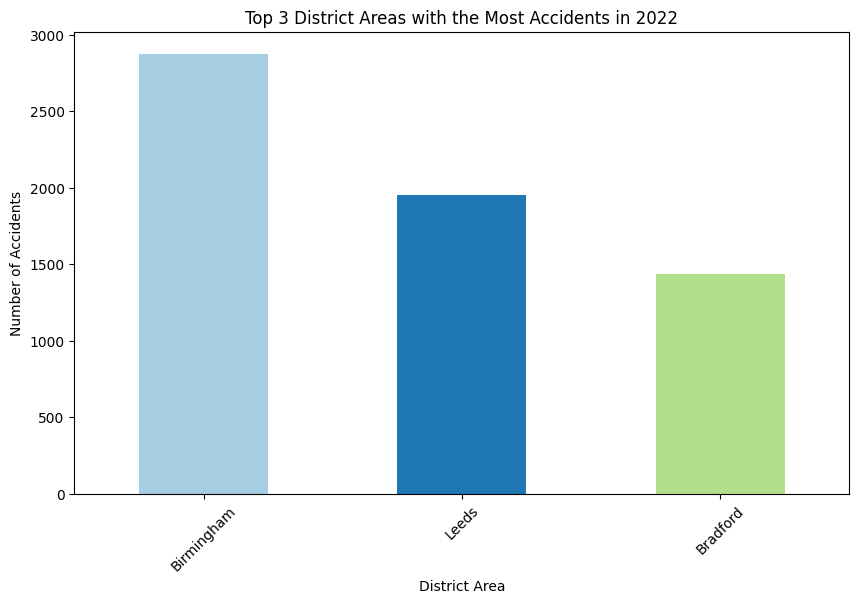

In [47]:
district_counts = accident_2022['District Area'].value_counts().head(3)

plt.figure(figsize=(10, 6))
district_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 3 District Areas with the Most Accidents in 2022')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h2> Insight 9</h2>

<h4> The Top 3 District Area That has the most accidents are Birminghan, Leeds, and Bradford. With Birminghan having the highest with 2876 accidents, then Leeds with 1954, and last is Bradford with 1439 </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h2> Overall Analysis </h2>

<h1> 10. What type of vehicle has more accidents? </h1>

In [41]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2> Insight 10 </h2>

<h4> The type of vehicle that has more accidents is a Car with a 497992 accidents accounting for 75.28% of the total accidents. </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 11. Which year has the most accidents? </h1>

In [42]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

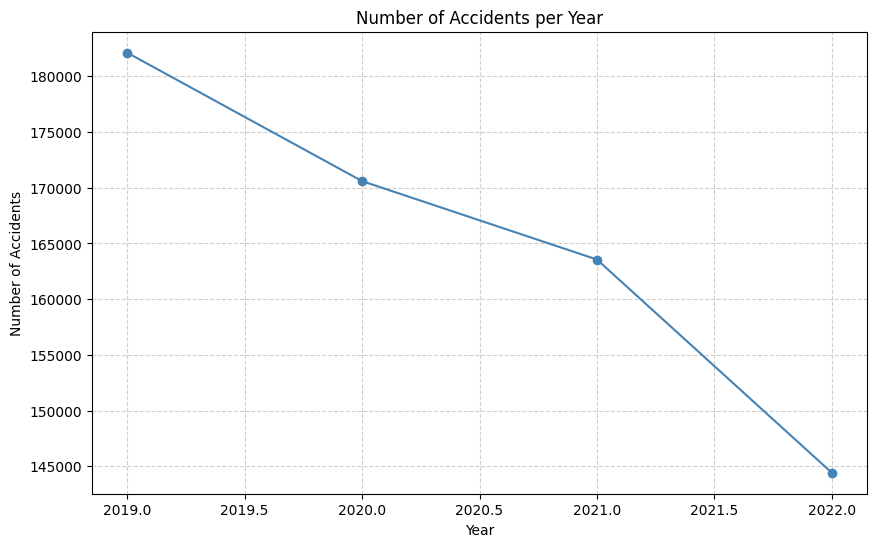

In [48]:
yearly_counts = accident['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', color='steelblue')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<h2> Insight 11 </h2>

<h4> The year that has the most accidents is 2019 with 182115 accidents, representing 27.56% of the total accidents. </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 12. Does the number of vehicles has an effect to the number of casualties? </h1>

In [43]:
accident_NC_NV = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

In [44]:
print(accident_NC_NV)

0.22888886126927627


<h2> Insight 12 </h2>

<h4> There are no correlation in the number of vehicles to the number of casualties  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 13. What is the most average road surface type to have an accident?

In [45]:
avg_vehicles_by_surface = accident.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean()
avg_vehicles_by_surface

Road_Surface_Conditions
Dry                          1.841792
Flood over 3cm. deep         1.610619
Frost or ice                 1.640006
Snow                         1.746859
Wet or damp                  1.829161
unknown surface condition    1.742424
Name: Number_of_Vehicles, dtype: float64

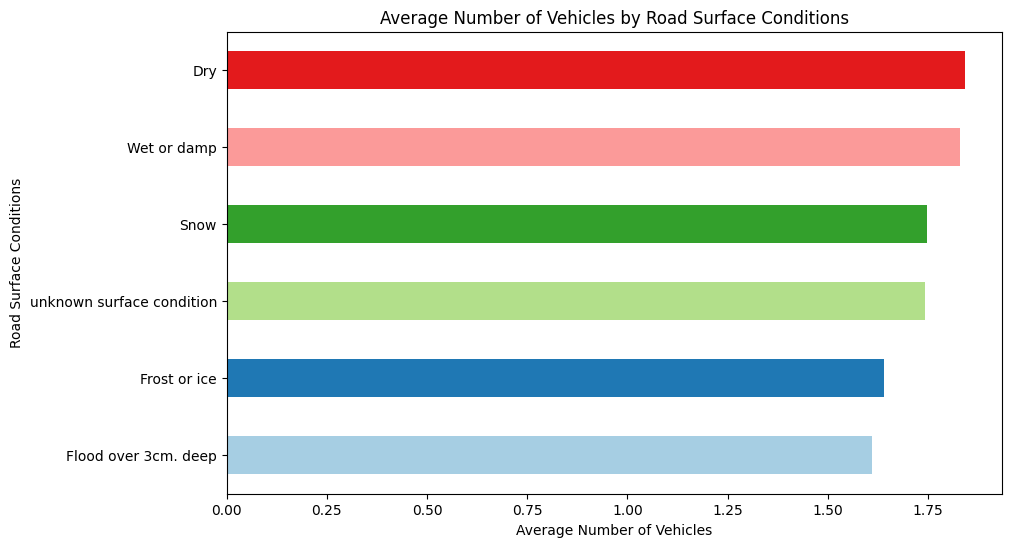

In [53]:
avg_vehicles_by_surface = accident.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean()

plt.figure(figsize=(10, 6))
avg_vehicles_by_surface.sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Average Number of Vehicles by Road Surface Conditions')
plt.xlabel('Average Number of Vehicles')
plt.ylabel('Road Surface Conditions')
plt.show()


<h2> Insight 13 </h2>

<h4> Although dry and wet road conditions are typically considered safer, they show the highest average number of vehicles per accident. This may indicate that under familiar conditions, drivers are more likely to take risks  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 14. Which month has the highest or most common to have an accident?

In [52]:
plt.figure(figsize=(10, 6))
accidents_by_month.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Month
January      52872
February     49491
March        54086
April        51744
May          56352
June         56481
July         57445
August       53913
September    56455
October      59580
November     60424
December     51836
Name: count, dtype: int64

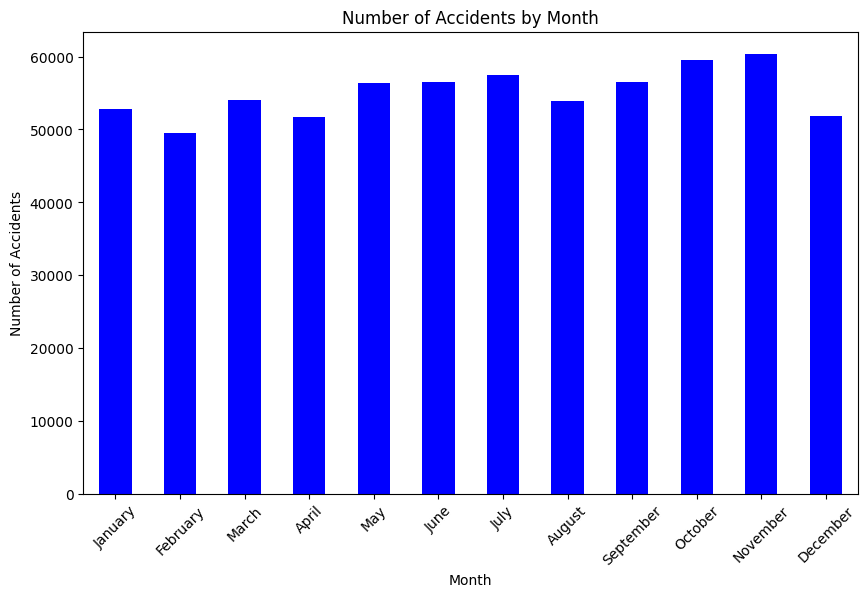

In [56]:
plt.figure(figsize=(10, 6))
accidents_by_month.plot(kind='bar', color="blue")
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h2> Insight 14 </h2>

<h4> Accidents peak in the late autumn and early winter months" — November (60,424), October (59,580), and July (57,445) recorded the highest number of accidents. This pattern may be influenced by factors like shorter daylight hours, poor weather conditions, and holiday-related travel.  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 15. Which district has more fata accident?

In [58]:
fatal_by_district = accident[accident['Accident_Severity'] == 'Fatal']['District Area'].value_counts().head(10)
fatal_by_district

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
Aberdeenshire                66
Powys                        59
Doncaster                    56
Wakefield                    56
Herefordshire, County of     51
Name: count, dtype: int64

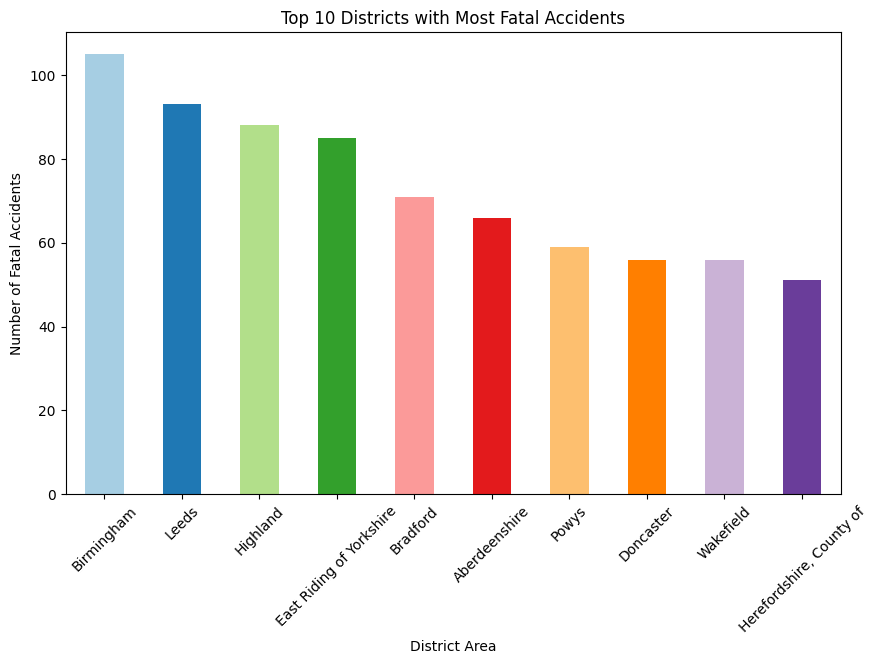

In [59]:
plt.figure(figsize=(10, 6))
fatal_by_district.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 10 Districts with Most Fatal Accidents')
plt.xlabel('District Area')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)
plt.show()

<h2> Insight 15 </h2>

<h4> Fatal accidents are not limited to large urban centers." While major cities like Birmingham and Leeds top the list in fatal accident counts, several rural or less densely populated areas such as Highland, Powys, and Herefordshire also report high fatality rates. This highlights that rural road conditions, longer emergency response times, and higher speed limits may significantly contribute to accident severity outside cities.  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 16. Does lighting have on traffic accident fatality rates during nighttime?

In [61]:
light_condition_counts = accident['Light_Conditions'].value_counts()
fatal_by_light = accident[accident['Accident_Severity'] == 'Fatal']['Light_Conditions'].value_counts()

light_severity_rate = pd.DataFrame({
    'Total Accidents': light_condition_counts,
    'Fatal Accidents': fatal_by_light
})

light_severity_rate['Fatality Rate (%)'] = (light_severity_rate['Fatal Accidents'] / light_severity_rate['Total Accidents']) * 100
light_severity_rate = light_severity_rate.sort_values(by='Fatality Rate (%)', ascending=False)
light_severity_rate

,Total Accidents,Fatal Accidents,Fatality Rate (%)
Light_Conditions,,,
Darkness - no lighting,37437,1612,4.305901
Darkness - lights unlit,2543,45,1.769564
Darkness - lights lit,129335,1860,1.438126
Darkness - lighting unknown,6484,68,1.048735
Daylight,484880,5076,1.046857


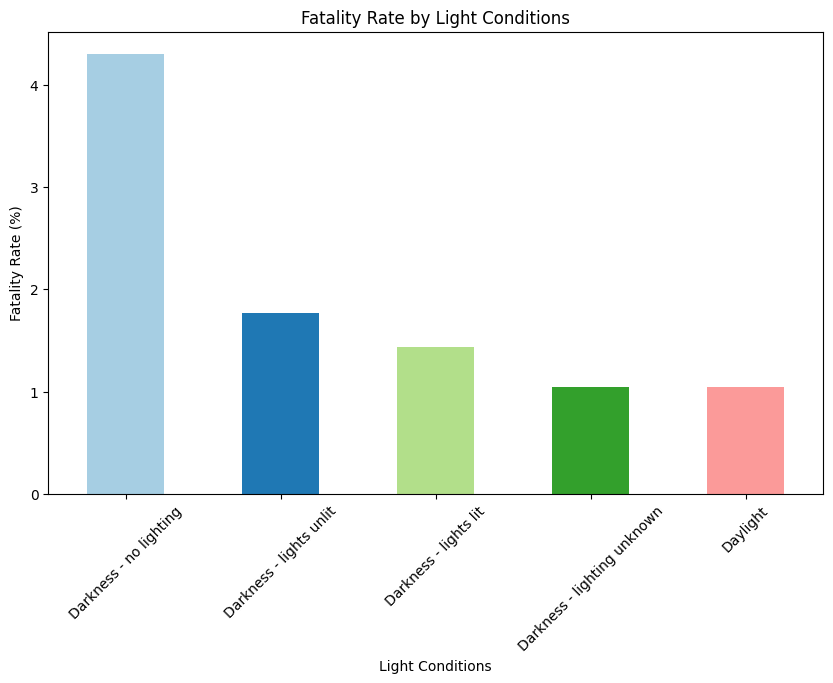

In [62]:
plt.figure(figsize=(10, 6))
light_severity_rate['Fatality Rate (%)'].plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Fatality Rate by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)
plt.show()

<h2> Insight 16 </h2>

<h4> Despite accounting for a smaller portion of total accidents, areas with no lighting during darkness have the highest fatality rate at 4.31% over four times higher than in daylight (1.05%). Even in cases where street lights are present but unlit, the fatality rate remains significantly elevated at 1.77%. This suggests that poor visibility and lack of proper lighting at night are major contributors to fatal accident severity.  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 17. Does the presence or absence of lighting during darkness impact the average number of casualties in traffic accidents?

In [63]:
avg_casualties_by_light = accident.groupby('Light_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False)
avg_casualties_by_light

Light_Conditions
Darkness - no lighting         1.541657
Darkness - lights lit          1.369374
Daylight                       1.340309
Darkness - lights unlit        1.331105
Darkness - lighting unknown    1.306447
Name: Number_of_Casualties, dtype: float64

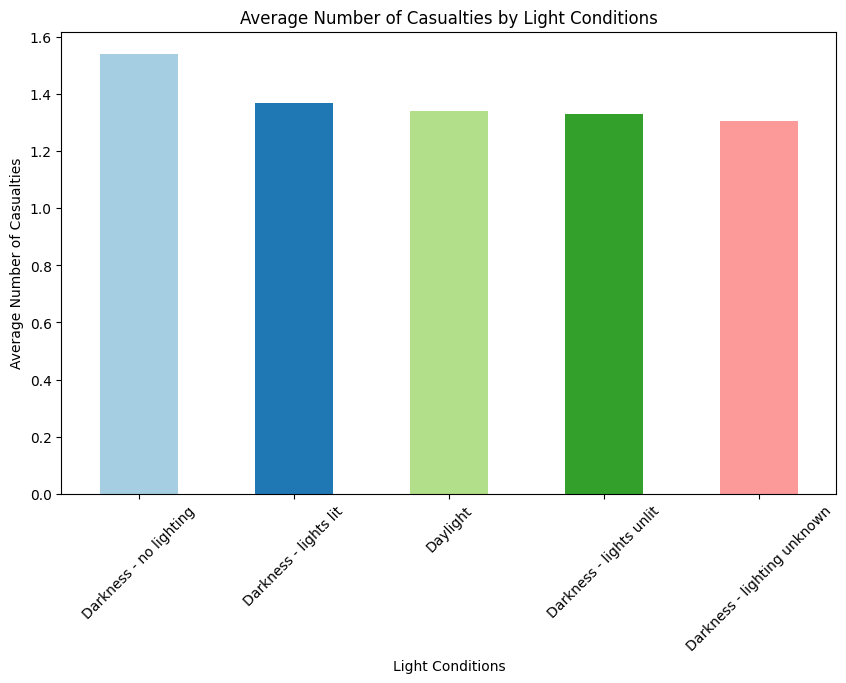

In [67]:
plt.figure(figsize=(10, 6))
avg_casualties_by_light.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Average Number of Casualties by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()

<h2> Insight 17 </h2>

<h4> The average number of casualties per accident is highest in areas with no lighting during darkness, with a mean of 1.54 casualties. While areas with lit street lights still have a relatively high average of 1.37 casualties, the average decreases in daylight  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 18. Which area tend to have more fatal accidents between urban and rural?

In [64]:
fatal_urban_rural = accident[accident['Accident_Severity'] == 'Fatal']['Urban_or_Rural_Area'].value_counts()
fatal_urban_rural

Urban_or_Rural_Area
Rural          5601
Urban          3060
Unallocated       0
Name: count, dtype: int64

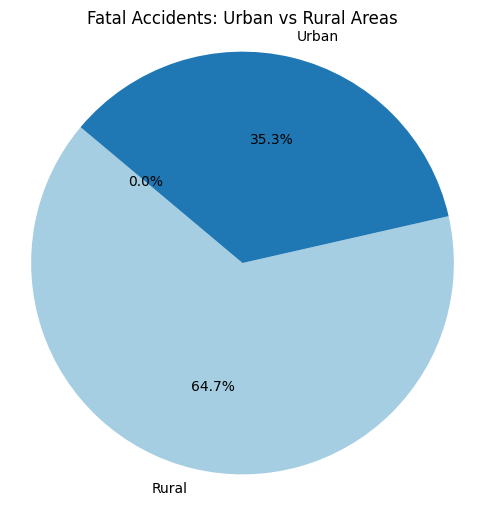

In [68]:
plt.figure(figsize=(6, 6))
fatal_urban_rural.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Fatal Accidents: Urban vs Rural Areas')
plt.ylabel('')
plt.axis('equal')
plt.show()

<h2> Insight 18 </h2>

<h4> Fatal accidents are significantly more common in rural areas, with 5,601 fatal accidents occurring compared to 3,060 in urban areas. This suggests that rural areas may have higher risk factors contributing to fatal accidents, such as less infrastructure, lower traffic volume, or longer emergency response times.  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 19. How does the number of vehicles involved in an accident affect the frequency of traffic accidents?

In [65]:
accidents_by_vehicle_count = accident['Number_of_Vehicles'].value_counts().sort_index()
accidents_by_vehicle_count

Number_of_Vehicles
1     200787
2     391995
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
12         7
13         6
14         9
15         1
16         4
19         1
28         1
32         1
Name: count, dtype: int64

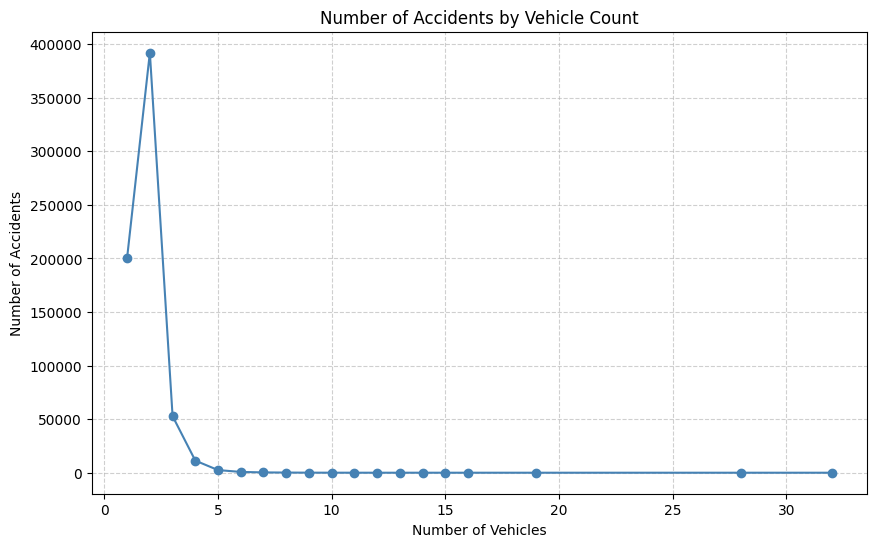

In [69]:
plt.figure(figsize=(10, 6))
accidents_by_vehicle_count.plot(kind='line', marker='o', color='steelblue')
plt.title('Number of Accidents by Vehicle Count')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h2> Insight 19 </h2>

<h4> The majority of accidents involve just one or two vehicles, with 200,787 accidents involving one vehicle and 391,995 accidents involving two vehicles. As the number of vehicles involved increases, the frequency of accidents decreases significantly. This indicates that most accidents are relatively low in complexity, involving a single vehicle or a pair of vehicles, while accidents involving higher numbers of vehicles are much less common.  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>

<h1> 20. How do different weather conditions impact the average number of casualties in traffic accidents?

In [66]:
avg_casualties_by_weather = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False)
avg_casualties_by_weather

Weather_Conditions
Fog or mist                      1.452948
Snowing + high winds             1.418079
Raining + high winds             1.416641
Raining no high winds            1.408214
Fine + high winds                1.386018
Other                            1.354869
Fine no high winds               1.350480
Snowing no high winds            1.341776
unaccounted weather condition    1.233720
Name: Number_of_Casualties, dtype: float64

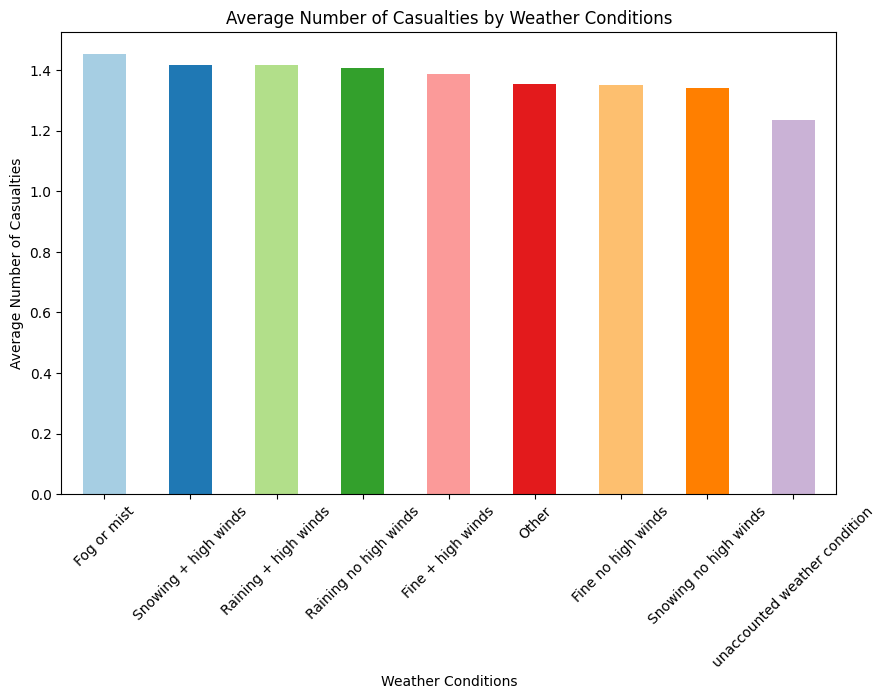

In [70]:
plt.figure(figsize=(10, 6))
avg_casualties_by_weather.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Average Number of Casualties by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()

<h2> Insight 20 </h2>

<h4> Accidents that occur in fog or mist conditions have the highest average number of casualties per accident (1.45), followed closely by accidents during snowing with high winds (1.42) and raining with high winds (1.42). Weather conditions involving high winds generally seem to result in higher casualty rates, regardless of whether it’s raining or snowing. On the other hand, fine weather conditions, with or without high winds, have the lowest average number of casualties, suggesting that severe weather conditions are a major factor in accident severity.  </h4>

<p>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</p>